In [5]:
%pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\dolap\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\dolap\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
import string
import nltk
from collections import Counter
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

##### Download the necessary NLTK resources

In [8]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dolap\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dolap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##### Step:1 Read the text file

In [9]:
def read_text_file(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        return file.read()


#### Step 2: Preprocess the Text

In [10]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Tokenize into words
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    return words

#### Step 3: Count Word Frequency

In [11]:
def count_word_frequency(words):
    return Counter(words)

##### Step 4: Visualize the Most Common Words

In [12]:
def plot_word_frequency(most_common_words):
    labels, counts = zip(*most_common_words)

    plt.figure(figsize=(10, 5))
    plt.bar(labels, counts, color="skyblue")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title("Most Common Words in Text File")
    plt.xticks(rotation=45)
    plt.show()

In [13]:
import nltk
nltk.download('punkt')  # Downloads the tokenizer
nltk.download('stopwords')  # Downloads stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dolap\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dolap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

##### Main Execution

In [15]:
if __name__ == "__main__":
    file_path = "C:/Users/dolap/Downloads/ChatgptData/prompt and results.txt"
    text = read_text_file(file_path)
    words = preprocess_text(text)
    word_counts = count_word_frequency(words)

##### Get the 10 most common words

In [16]:
most_common_words = word_counts.most_common(10)
print("Most common words:", most_common_words)

Most common words: [('species', 3647), ('data', 3615), ('1', 2017), ('research', 1975), ('2', 1603), ('model', 1578), ('’', 1515), ('chatgpt', 1510), ('user', 1425), ('marine', 1382)]


##### Plot the results

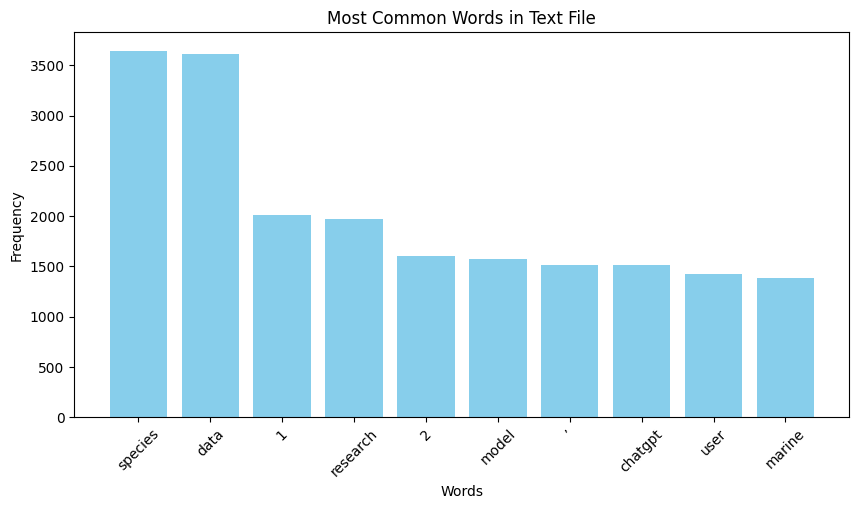

In [17]:
plot_word_frequency(most_common_words)

###### Observations & Possible Fixes
Numbers are being counted (1, 2, etc.)
- If numbers aren't meaningful for your analysis, remove them.

Special characters (’) appear in the results
- Some punctuation might still be there due to encoding issues.

Words like ‘chatgpt’ and ‘user’ are frequent
- If these are unwanted, we can manually filter them out.

In [25]:
import re #Re is python's built-in Regular Expression (regex) module. It allows you to search, match, and manipulate text patterns efficiently.

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize into words
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    custom_stopwords = {'chatgpt', 'user', '’', '°c' }  # Add any unwanted words
    words = [word for word in words if word not in stop_words and word not in custom_stopwords]
    return words

In [26]:
def count_word_frequency(words):
    return Counter(words)

In [27]:
if __name__ == "__main__":
    file_path = "C:/Users/dolap/Downloads/ChatgptData/prompt and results.txt"
    text = read_text_file(file_path)
    words = preprocess_text(text)
    word_counts = count_word_frequency(words)

In [29]:
most_common_words = word_counts.most_common(10)
print("Most common words:", most_common_words)

Most common words: [('species', 3708), ('data', 3625), ('research', 1975), ('model', 1579), ('smr', 1447), ('marine', 1382), ('biodiversity', 1358), ('temperature', 1343), ('like', 1143), ('analysis', 1078)]


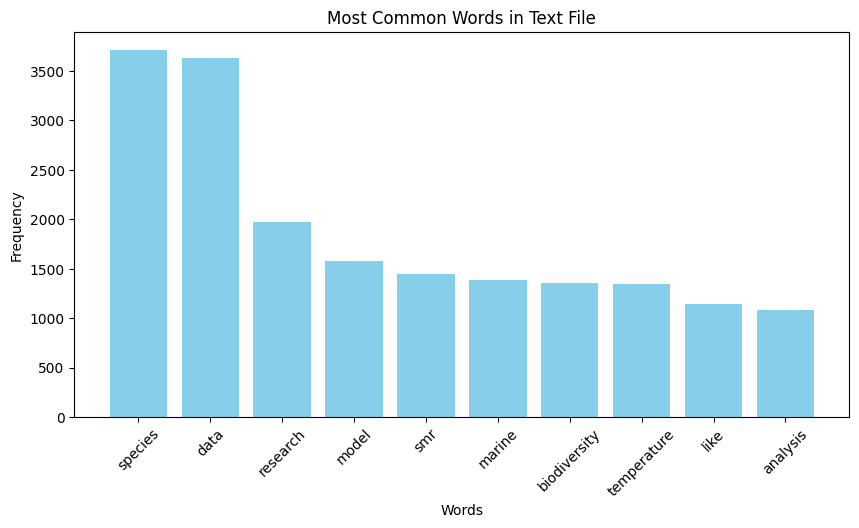

In [31]:
plot_word_frequency(most_common_words)

In [23]:
%pip install wordcloud


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\dolap\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


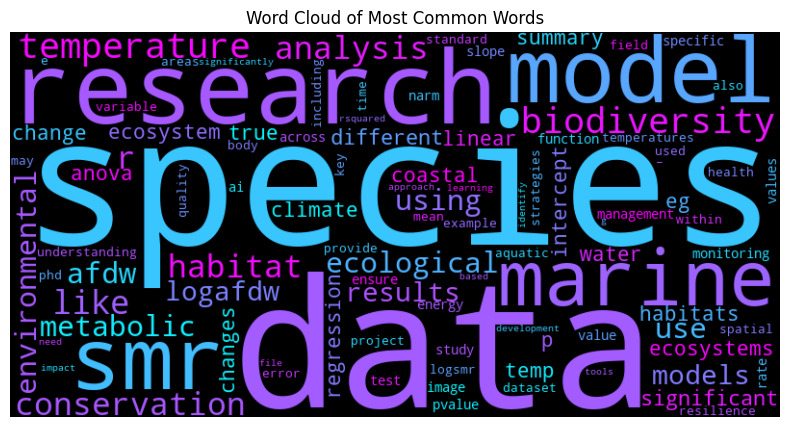

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(word_counts):
    wordcloud = WordCloud(width=800, height=400, background_color="black",
                          colormap="cool", max_words=100).generate_from_frequencies(word_counts)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")  # Hide axis
    plt.title("Word Cloud of Most Common Words")
    plt.show()

# Call function after word frequency calculation
generate_wordcloud(word_counts)